## Trapped fraction

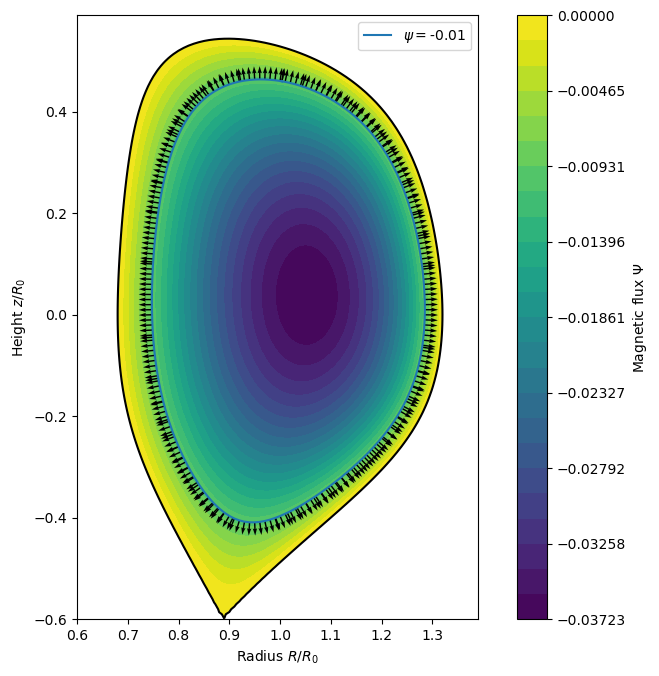

In [1]:
import plasmaboundaries

from plasmapy.plasma.symbolicequilibrium import SymbolicEquilibrium

params = plasmaboundaries.ITER.copy()
assert params["triangularity"] <= 0.841  # for convex plasma surfaces
eq = SymbolicEquilibrium(**params, B0=5.2, config="single-null")
ax = eq.plot()
fs = eq.get_flux_surface(-0.01)
fs.plot(ax, n=True);

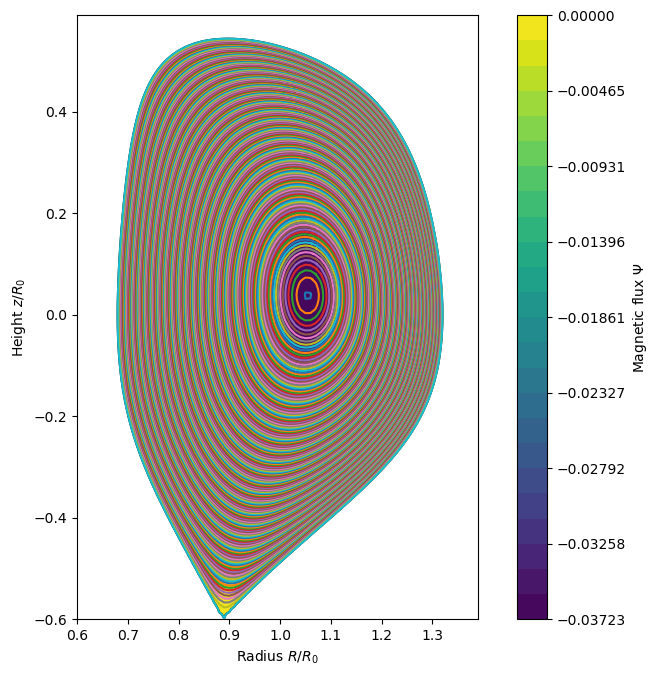

In [2]:
levels = np.linspace(-0.03722, 0, 200)
surfaces = {level: eq.get_flux_surface(level) for level in levels}

ax = eq.plot()
# ax = None
for fs in surfaces.values():
    ax = fs.plot(ax, legend=False)

,f_tl,f_tu,f_t,f_ta_10,f_ta_100,f_ta_1000
-0.037220,0.093916,0.112691,0.107997,-0.285381,0.094658,0.107939
-0.037033,0.193955,0.213734,0.208789,0.099826,0.206872,0.208850
-0.036846,0.230628,0.252864,0.247305,0.171784,0.246217,0.247442
-0.036659,0.252909,0.276970,0.270955,0.209477,0.270162,0.271110
-0.036472,0.271500,0.296272,0.290079,0.238063,0.289448,0.290213
...,...,...,...,...,...,...
-0.000748,0.636578,0.665117,0.657982,0.654976,0.658435,0.658473
-0.000561,0.637708,0.665836,0.658804,0.655832,0.659251,0.659288
-0.000374,0.638701,0.666361,0.659446,0.656503,0.659884,0.659920
-0.000187,0.640080,0.666973,0.660250,0.657351,0.660675,0.660711


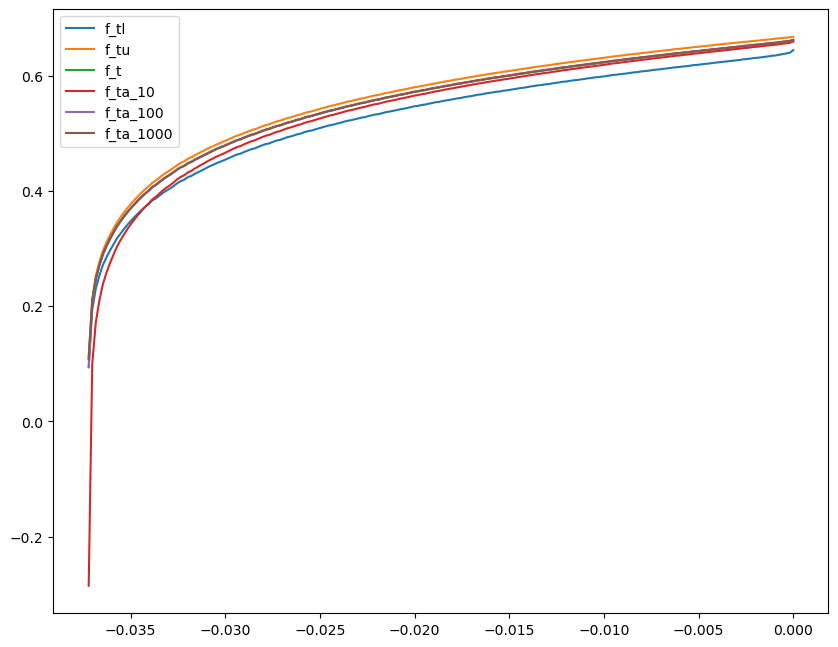

In [30]:
import pandas as pd

trapped_fractions = {}
for psi_value, fs in surfaces.items():
    trapped_fractions[psi_value] = {
        "f_tl": fs._f_tl,
        "f_tu": fs._f_tu,
        "f_t": fs.trapped_fraction(),
    }
    for N in [10, 100, 1000]:
        trapped_fractions[psi_value][f"f_ta_{N}"] = fs.trapped_fraction_analytical(N)

df = pd.DataFrame(trapped_fractions).T
df.plot()
display(df)